In [1]:
## Data Analytics Final Project

In [2]:
## Topic : 'Healthcare Costs and Outcome Pattern Analysis'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df  = pd.read_csv(r'C:\Users\User\Downloads\Simulated_Clinical_and_Billing_Data_for_Healthcare_Analytics.csv')

In [5]:
df

,patient_id,gender,age,visit_date,department,physician_id,diagnosis,visit_type,visit_reason,appointment_id,is_emergency,insurance_id,payer_name,payer_type,claim_status,charge_amount_USD,payment_amount_USD,admission_date,discharge_date
0,154669,Male,43,2024-11-05,Cardiology,30927,Hypertension,Outpatient,NaN,A00000,Yes,INS-MMIAPD,Flores-Allen,Government,Submitted,247,0,NaN,NaN
1,144776,Female,56,2024-12-15,Cardiology,14816,Hypertension,Outpatient,Chest Pain,A00001,No,INS-M2HVS3,"Anderson, Oconnell and Yates",Insurance,Approved,296,0,NaN,NaN
2,217503,Male,49,2024-01-02,Orthopedics,73819,Back Pain,Inpatient,Surgery Follow-up,A00002,No,INS-GMOCQU,Jackson-Hubbard,Government,Denied,1240,992,2024-01-02,2024-01-26
3,174851,Male,8,2024-06-29,Pediatrics,81325,Asthma,Outpatient,Fever,A00003,No,NaN,Self-pay,Self-pay,Paid,43,43,NaN,NaN
4,193134,Female,39,2024-11-21,Cardiology,10046,Heart Failure,Outpatient,Chest Pain,A00004,Yes,NaN,Gonzalez Group,Insurance,Approved,219,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,115979,Male,2,2024-04-29,Pediatrics,28212,Infection,Inpatient,Fever,A05995,No,INS-J5RZR4,Merritt-Flynn,Government,Denied,75,0,2024-04-29,2024-05-20
5996,201404,Male,9,2025-01-29,Pediatrics,99754,Asthma,Outpatient,NaN,A05996,Yes,NaN,Self-pay,Self-pay,Paid,56,56,NaN,NaN
5997,146624,Female,44,2024-06-28,Orthopedics,63032,Back Pain,Outpatient,NaN,A05997,Yes,NaN,Self-pay,Self-pay,Paid,122,122,NaN,NaN
5998,119838,Male,60,2023-10-10,Neurology,51368,Epilepsy,Outpatient,Headache,A05998,No,INS-7VLQ4S,"Smith, Cole and Rodgers",Insurance,Approved,122,0,NaN,NaN


In [6]:
## Initial Overview of the loaded Dataset

In [7]:
print('Number of Rows and Columns: ', df.shape)

Number of Rows and Columns:  (6000, 19)


In [8]:
df.head(16)

,patient_id,gender,age,visit_date,department,physician_id,diagnosis,visit_type,visit_reason,appointment_id,is_emergency,insurance_id,payer_name,payer_type,claim_status,charge_amount_USD,payment_amount_USD,admission_date,discharge_date
0,154669,Male,43,2024-11-05,Cardiology,30927,Hypertension,Outpatient,NaN,A00000,Yes,INS-MMIAPD,Flores-Allen,Government,Submitted,247,0,NaN,NaN
1,144776,Female,56,2024-12-15,Cardiology,14816,Hypertension,Outpatient,Chest Pain,A00001,No,INS-M2HVS3,"Anderson, Oconnell and Yates",Insurance,Approved,296,0,NaN,NaN
2,217503,Male,49,2024-01-02,Orthopedics,73819,Back Pain,Inpatient,Surgery Follow-up,A00002,No,INS-GMOCQU,Jackson-Hubbard,Government,Denied,1240,992,2024-01-02,2024-01-26
3,174851,Male,8,2024-06-29,Pediatrics,81325,Asthma,Outpatient,Fever,A00003,No,NaN,Self-pay,Self-pay,Paid,43,43,NaN,NaN
4,193134,Female,39,2024-11-21,Cardiology,10046,Heart Failure,Outpatient,Chest Pain,A00004,Yes,NaN,Gonzalez Group,Insurance,Approved,219,0,NaN,NaN
5,118420,Male,12,2024-01-01,Neurology,58773,Stroke,Outpatient,Numbness,A00005,Yes,INS-03W1NL,Jackson-Hubbard,Government,Submitted,140,0,NaN,NaN
6,166646,Male,39,2025-06-20,Orthopedics,27827,Back Pain,Outpatient,Injury,A00006,No,NaN,Self-pay,Self-pay,Paid,141,141,NaN,NaN
7,175552,Male,29,2024-03-25,Neurology,81494,Epilepsy,Inpatient,NaN,A00007,No,INS-IUD7I5,"Richard, Floyd and Villanueva",Insurance,Approved,186,0,2024-03-25,2024-04-05
8,182683,Male,41,2025-02-26,Cardiology,80016,Heart Failure,Inpatient,Follow-up,A00008,Yes,INS-2R01J3,"Johnson, Mcintyre and Garrett",Insurance,Denied,231,0,2025-02-26,2025-03-09
9,116872,Female,13,2024-10-07,Oncology,70392,Melanoma,Inpatient,Follow-up,A00009,No,NaN,Self-pay,Self-pay,Paid,1098,1098,2024-10-07,2024-10-30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          6000 non-null   int64 
 1   gender              6000 non-null   object
 2   age                 6000 non-null   int64 
 3   visit_date          6000 non-null   object
 4   department          6000 non-null   object
 5   physician_id        6000 non-null   int64 
 6   diagnosis           5576 non-null   object
 7   visit_type          6000 non-null   object
 8   visit_reason        5601 non-null   object
 9   appointment_id      6000 non-null   object
 10  is_emergency        6000 non-null   object
 11  insurance_id        3697 non-null   object
 12  payer_name          5598 non-null   object
 13  payer_type          6000 non-null   object
 14  claim_status        6000 non-null   object
 15  charge_amount_USD   6000 non-null   int64 
 16  payment_amount_USD  6000

In [10]:
df.describe()

,patient_id,age,physician_id,charge_amount_USD,payment_amount_USD
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,165320.868833,37.539333,54477.194833,349.127000,142.259333
std,31664.496141,20.092670,25957.515724,625.756656,502.622747
min,110015.000000,1.000000,10002.000000,40.000000,0.000000
25%,137784.000000,19.000000,31694.250000,131.750000,0.000000
50%,165830.500000,40.000000,54671.500000,177.000000,0.000000
75%,192591.250000,54.000000,76971.500000,282.000000,141.000000
max,219998.000000,80.000000,99954.000000,11940.000000,9552.000000


In [11]:
## Checking for duplicates

In [12]:
df.duplicated().sum()

0

In [13]:
## Checking for missing values

In [14]:
df.isnull().sum()

patient_id               0
gender                   0
age                      0
visit_date               0
department               0
physician_id             0
diagnosis              424
visit_type               0
visit_reason           399
appointment_id           0
is_emergency             0
insurance_id          2303
payer_name             402
payer_type               0
claim_status             0
charge_amount_USD        0
payment_amount_USD       0
admission_date        2988
discharge_date        2988
dtype: int64

In [15]:
## Handling Missing Values

In [16]:
df['diagnosis'] = df['diagnosis'].fillna('Unknown')

In [17]:
df['visit_reason'] = df['visit_reason'].fillna('Checkup')

In [18]:
df['insurance_id'] = df['insurance_id'].fillna('Unknown')

In [19]:
df['payer_name'] = df['payer_name'].fillna('Name Unknown')

In [20]:
df['discharge_date'] = df['discharge_date'].fillna('Date Unknown')

In [21]:
## Since valid values in both visit_date and admission_date are same

In [22]:
df['admission_date'] = df['visit_date']

In [23]:
df.isnull().sum()

patient_id            0
gender                0
age                   0
visit_date            0
department            0
physician_id          0
diagnosis             0
visit_type            0
visit_reason          0
appointment_id        0
is_emergency          0
insurance_id          0
payer_name            0
payer_type            0
claim_status          0
charge_amount_USD     0
payment_amount_USD    0
admission_date        0
discharge_date        0
dtype: int64

In [24]:
## Correction of Datatypes

In [25]:
df['charge_amount_USD'] = df['charge_amount_USD'].astype(float)

In [26]:
df['payment_amount_USD'] = df['payment_amount_USD'].astype(float)

In [27]:
df['admission_date'] = pd.to_datetime(df['admission_date'])

In [28]:
df['visit_date'] = pd.to_datetime(df['visit_date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          6000 non-null   int64         
 1   gender              6000 non-null   object        
 2   age                 6000 non-null   int64         
 3   visit_date          6000 non-null   datetime64[ns]
 4   department          6000 non-null   object        
 5   physician_id        6000 non-null   int64         
 6   diagnosis           6000 non-null   object        
 7   visit_type          6000 non-null   object        
 8   visit_reason        6000 non-null   object        
 9   appointment_id      6000 non-null   object        
 10  is_emergency        6000 non-null   object        
 11  insurance_id        6000 non-null   object        
 12  payer_name          6000 non-null   object        
 13  payer_type          6000 non-null   object      

In [30]:
## Creating a Derived Column

In [31]:
df['balance_amount_USD'] = df['charge_amount_USD'] - df['payment_amount_USD']

In [32]:
df['balance_amount_USD']

0       247.0
1       296.0
2       248.0
3         0.0
4       219.0
        ...  
5995     75.0
5996      0.0
5997      0.0
5998    122.0
5999    162.0
Name: balance_amount_USD, Length: 6000, dtype: float64

In [33]:
df['admission_year'] = df['admission_date'].dt.year

In [34]:
df

,patient_id,gender,age,visit_date,department,physician_id,diagnosis,visit_type,visit_reason,appointment_id,...,insurance_id,payer_name,payer_type,claim_status,charge_amount_USD,payment_amount_USD,admission_date,discharge_date,balance_amount_USD,admission_year
0,154669,Male,43,2024-11-05,Cardiology,30927,Hypertension,Outpatient,Checkup,A00000,...,INS-MMIAPD,Flores-Allen,Government,Submitted,247.0,0.0,2024-11-05,Date Unknown,247.0,2024
1,144776,Female,56,2024-12-15,Cardiology,14816,Hypertension,Outpatient,Chest Pain,A00001,...,INS-M2HVS3,"Anderson, Oconnell and Yates",Insurance,Approved,296.0,0.0,2024-12-15,Date Unknown,296.0,2024
2,217503,Male,49,2024-01-02,Orthopedics,73819,Back Pain,Inpatient,Surgery Follow-up,A00002,...,INS-GMOCQU,Jackson-Hubbard,Government,Denied,1240.0,992.0,2024-01-02,2024-01-26,248.0,2024
3,174851,Male,8,2024-06-29,Pediatrics,81325,Asthma,Outpatient,Fever,A00003,...,Unknown,Self-pay,Self-pay,Paid,43.0,43.0,2024-06-29,Date Unknown,0.0,2024
4,193134,Female,39,2024-11-21,Cardiology,10046,Heart Failure,Outpatient,Chest Pain,A00004,...,Unknown,Gonzalez Group,Insurance,Approved,219.0,0.0,2024-11-21,Date Unknown,219.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,115979,Male,2,2024-04-29,Pediatrics,28212,Infection,Inpatient,Fever,A05995,...,INS-J5RZR4,Merritt-Flynn,Government,Denied,75.0,0.0,2024-04-29,2024-05-20,75.0,2024
5996,201404,Male,9,2025-01-29,Pediatrics,99754,Asthma,Outpatient,Checkup,A05996,...,Unknown,Self-pay,Self-pay,Paid,56.0,56.0,2025-01-29,Date Unknown,0.0,2025
5997,146624,Female,44,2024-06-28,Orthopedics,63032,Back Pain,Outpatient,Checkup,A05997,...,Unknown,Self-pay,Self-pay,Paid,122.0,122.0,2024-06-28,Date Unknown,0.0,2024
5998,119838,Male,60,2023-10-10,Neurology,51368,Epilepsy,Outpatient,Headache,A05998,...,INS-7VLQ4S,"Smith, Cole and Rodgers",Insurance,Approved,122.0,0.0,2023-10-10,Date Unknown,122.0,2023


In [35]:
## To filter out the details of the patient with the highest bill amount charged

In [36]:
highest_charge_amount = df[df['charge_amount_USD'] > 10000].max()

In [37]:
highest_charge_amount

patient_id                               209469
gender                                     Male
age                                          76
visit_date                  2025-06-28 00:00:00
department                             Oncology
physician_id                              99415
diagnosis                              Melanoma
visit_type                           Outpatient
visit_reason                          Follow-up
appointment_id                           A05706
is_emergency                                Yes
insurance_id                            Unknown
payer_name            Thomas, Blake and Harding
payer_type                             Self-pay
claim_status                          Submitted
charge_amount_USD                       11940.0
payment_amount_USD                       9552.0
admission_date              2025-06-28 00:00:00
discharge_date                     Date Unknown
balance_amount_USD                       2388.0
admission_year                          

In [38]:
## To filter out the department with most visits

In [39]:
most_deparment_visits = df['department'].value_counts().head(1)

In [40]:
print('Department with most visits: ',most_deparment_visits)

Department with most visits:  department
Cardiology    1261
Name: count, dtype: int64


## Visualizations

In [41]:
#1. Bar Chart: To find the Charged amount and balance amount to be paid based on diagnosis

In [42]:
df1 = df.groupby('diagnosis')['charge_amount_USD'].sum()

In [43]:
df1

diagnosis
Arrhythmia       117397.0
Arthritis         70519.0
Asthma            30139.0
Back Pain         74331.0
Cancer           230184.0
Epilepsy          66725.0
Flu               24531.0
Fracture          64929.0
Heart Failure    113336.0
Hypertension      94943.0
Infection         27798.0
Leukemia         303027.0
Lymphoma         262872.0
Melanoma         328463.0
Migraine          65460.0
Stroke            72503.0
Unknown          147605.0
Name: charge_amount_USD, dtype: float64

In [44]:
df2 = df.groupby('diagnosis')['balance_amount_USD'].sum()

In [45]:
df2

diagnosis
Arrhythmia        63438.0
Arthritis         41224.0
Asthma            15836.0
Back Pain         39834.0
Cancer           173920.0
Epilepsy          41130.0
Flu               14319.0
Fracture          39593.0
Heart Failure     60372.0
Hypertension      55192.0
Infection         15381.0
Leukemia         175987.0
Lymphoma         151012.0
Melanoma         187319.0
Migraine          39801.0
Stroke            41390.0
Unknown           85458.0
Name: balance_amount_USD, dtype: float64

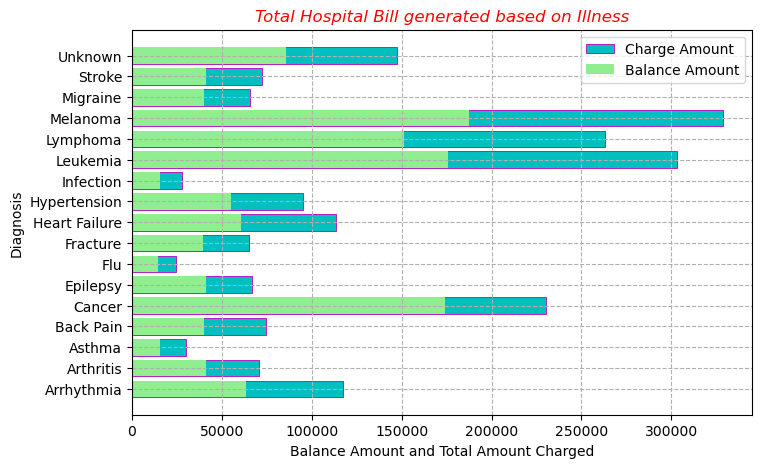

In [46]:
plt.figure(figsize=(8,5))
plt.barh(df1.index, df1, color = 'c', edgecolor = 'm', linewidth = 0.6, label = 'Charge Amount')
plt.barh(df2.index, df2, color = 'lightgreen', label = 'Balance Amount')
plt.xlabel('Balance Amount and Total Amount Charged')
plt.ylabel('Diagnosis')
plt.title('Total Hospital Bill generated based on Illness', color = 'red', style = 'italic')
plt.grid(True, linestyle = '--')
plt.legend()
plt.show();

In [47]:
##2. Pie Chart: To Summarize the Claim Approval Status

In [48]:
claim_status = df.groupby('claim_status')['patient_id'].count()

In [49]:
claim_status

claim_status
Approved     1343
Denied       1334
Paid         1997
Submitted    1326
Name: patient_id, dtype: int64

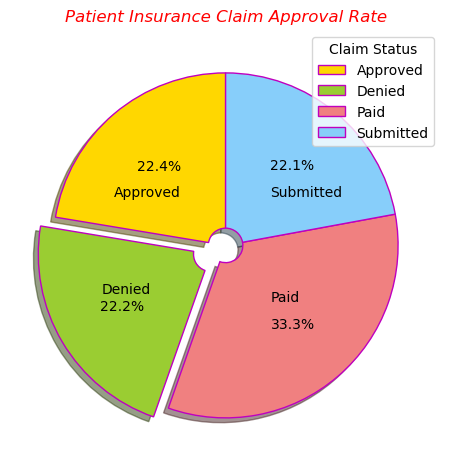

In [50]:
plt.figure(figsize=(5.6,5.6))
plt.pie(claim_status, labels = claim_status.index, 
        autopct = '%1.1f%%', wedgeprops = {'width':0.9, 'edgecolor': 'm'}, startangle = 90, explode = (0.0, 0.1, 0.0, 0.0),
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'], shadow = True, labeldistance = 0.4)
plt.legend(loc = 'best', title = 'Claim Status')
plt.title('Patient Insurance Claim Approval Rate', color = 'red', style = 'italic')
plt.show();

In [51]:
#3. Line Chart : To find out if there is a hike in denied claims for emergency cases

In [52]:
filtered_df = df[(df['claim_status'] == 'Denied') & (df['is_emergency'] == 'Yes')]

In [53]:
filtered_df

,patient_id,gender,age,visit_date,department,physician_id,diagnosis,visit_type,visit_reason,appointment_id,...,insurance_id,payer_name,payer_type,claim_status,charge_amount_USD,payment_amount_USD,admission_date,discharge_date,balance_amount_USD,admission_year
8,182683,Male,41,2025-02-26,Cardiology,80016,Heart Failure,Inpatient,Follow-up,A00008,...,INS-2R01J3,"Johnson, Mcintyre and Garrett",Insurance,Denied,231.0,0.0,2025-02-26,2025-03-09,231.0,2025
10,183273,Female,36,2025-06-25,Oncology,58302,Unknown,Inpatient,Chemo,A00010,...,INS-7EJ3L7,"Lopez, Johnson and Myers",Government,Denied,771.0,0.0,2025-06-25,2025-07-23,771.0,2025
48,127204,Male,24,2024-01-01,Neurology,39112,Migraine,Outpatient,Headache,A00048,...,INS-YCSSTR,Merritt-Flynn,Government,Denied,199.0,0.0,2024-01-01,Date Unknown,199.0,2024
50,195947,Male,46,2023-08-16,Cardiology,32450,Arrhythmia,Outpatient,Follow-up,A00050,...,INS-383XIV,"Andrade, Gilbert and Cook",Insurance,Denied,250.0,0.0,2023-08-16,Date Unknown,250.0,2023
69,155328,Male,39,2024-07-29,Neurology,95691,Migraine,Outpatient,Seizure,A00069,...,INS-HH2X3T,Flores-Allen,Government,Denied,190.0,0.0,2024-07-29,Date Unknown,190.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934,176190,Male,38,2023-10-23,Oncology,84681,Melanoma,Outpatient,Chemo,A05934,...,INS-E9F7XS,Flores-Allen,Government,Denied,1099.0,0.0,2023-10-23,Date Unknown,1099.0,2023
5949,132395,Female,54,2025-05-08,Neurology,89186,Stroke,Inpatient,Seizure,A05949,...,INS-M548LV,Brooks-Johnson,Insurance,Denied,185.0,0.0,2025-05-08,2025-05-25,185.0,2025
5956,134713,Male,29,2024-11-07,Orthopedics,42340,Arthritis,Outpatient,Injury,A05956,...,INS-N84TKH,Brooks-Johnson,Insurance,Denied,152.0,0.0,2024-11-07,Date Unknown,152.0,2024
5978,191743,Male,18,2024-09-27,Neurology,45849,Migraine,Outpatient,Headache,A05978,...,INS-7W6OQ6,Shaw-Jacobs,Insurance,Denied,141.0,0.0,2024-09-27,Date Unknown,141.0,2024


In [54]:
df2 =  filtered_df['visit_date'].value_counts().sort_index()

In [55]:
visit_date = filtered_df['visit_date'].dt.to_period('M')

In [56]:
month_wise_df =  filtered_df.groupby(visit_date).size()

In [57]:
month_wise_df

visit_date
2023-07    17
2023-08    31
2023-09    24
2023-10    28
2023-11    32
2023-12    24
2024-01    29
2024-02    30
2024-03    22
2024-04    27
2024-05    17
2024-06    31
2024-07    26
2024-08    26
2024-09    27
2024-10    26
2024-11    24
2024-12    27
2025-01    32
2025-02    30
2025-03    25
2025-04    20
2025-05    25
2025-06    29
2025-07    21
Freq: M, dtype: int64

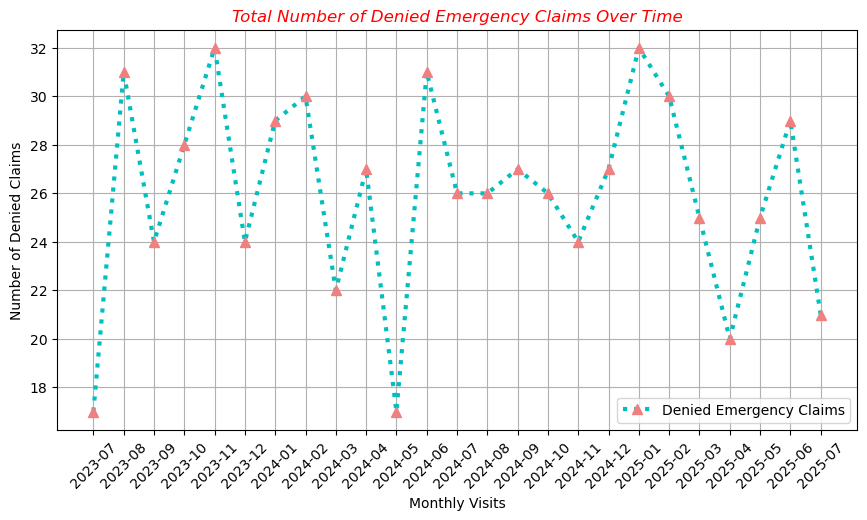

In [58]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0,0,1,0.8])
ax.plot(month_wise_df.index.astype(str), month_wise_df.values, marker = '^', mfc = 'lightcoral', mec = 'lightcoral', ms = 7,
         linewidth = 3, color = 'c', ls = ':', label = 'Denied Emergency Claims')
plt.legend(loc = 'best')
plt.xlabel('Monthly Visits')
plt.ylabel('Number of Denied Claims')
plt.title('Total Number of Denied Emergency Claims Over Time', color = 'red', style = 'italic')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show();


In [59]:
#4 Countplot: To find out which department had the most denied claims

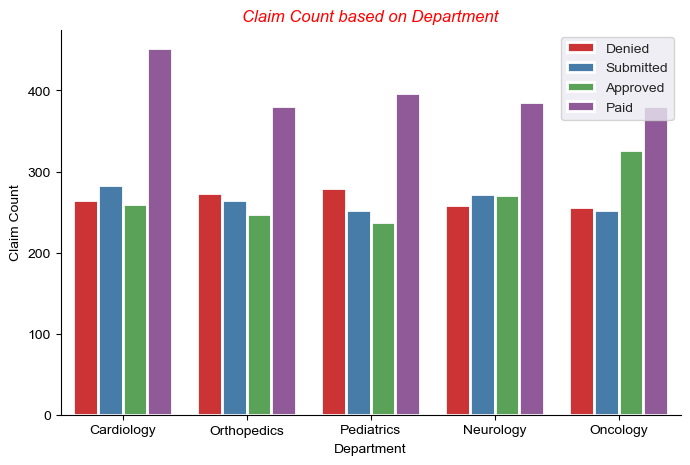

In [60]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'department', hue = 'claim_status', palette = 'Set1', edgecolor = 'white',
              linewidth = 2, hue_order = ['Denied', 'Submitted', 'Approved', 'Paid'])
sns.despine()
sns.set_style('darkgrid')
plt.legend(loc = 'upper right')
plt.title('Claim Count based on Department', color = 'red', style = 'italic')
plt.xlabel('Department')
plt.ylabel('Claim Count')
plt.show()

In [61]:
#5. Scatterplot: To discover if the charged bill amount is irrespective of Age or not!

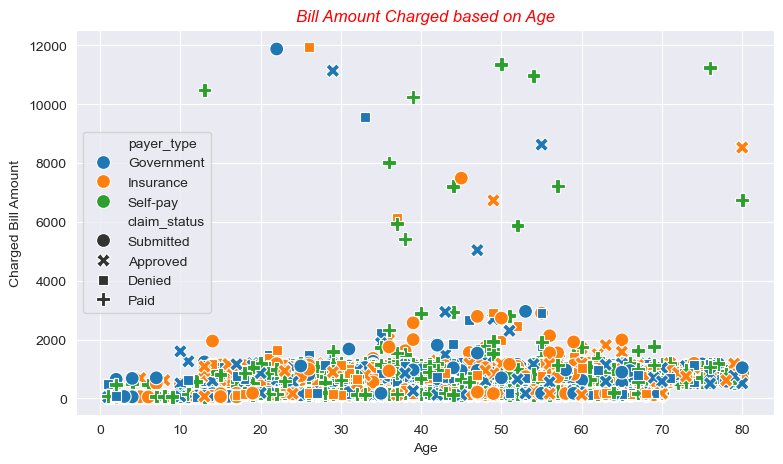

In [62]:
plt.figure(figsize=(9,5))
sns.scatterplot(data= df, x = 'age', y = 'charge_amount_USD', hue = 'payer_type', style = 'claim_status', s = 100)
sns.set_style('darkgrid')
plt.xlabel('Age')
plt.ylabel('Charged Bill Amount')
plt.title('Bill Amount Charged based on Age', color = 'red', style = 'italic')
plt.show()

In [63]:
#6. Histogram: To find out the distrbution of Age Category

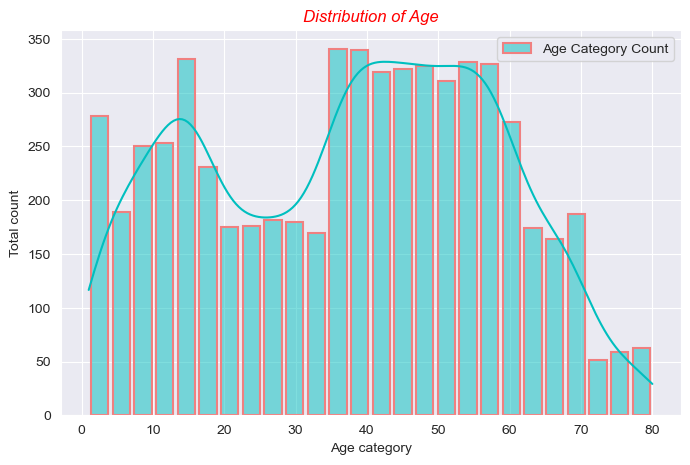

In [64]:
plt.figure(figsize=(8,5))
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100)
sns.histplot(data = df, x = 'age', stat = 'count', kde = True, color = 'c', edgecolor = 'lightcoral',
            linewidth = 1.5, shrink = 0.8, bins = bins, binwidth = 3, label = 'Age Category Count')
sns.set_style('darkgrid')
plt.legend()
plt.xlabel('Age category')
plt.ylabel('Total count')
plt.title('Distribution of Age', color = 'red', style = 'italic')
plt.show()

In [65]:
#7. Heatmap: To Check out the correlation between charged, payment and the balance amount to be paid

In [66]:
correlation = df[['charge_amount_USD', 'payment_amount_USD', 'balance_amount_USD']].corr()

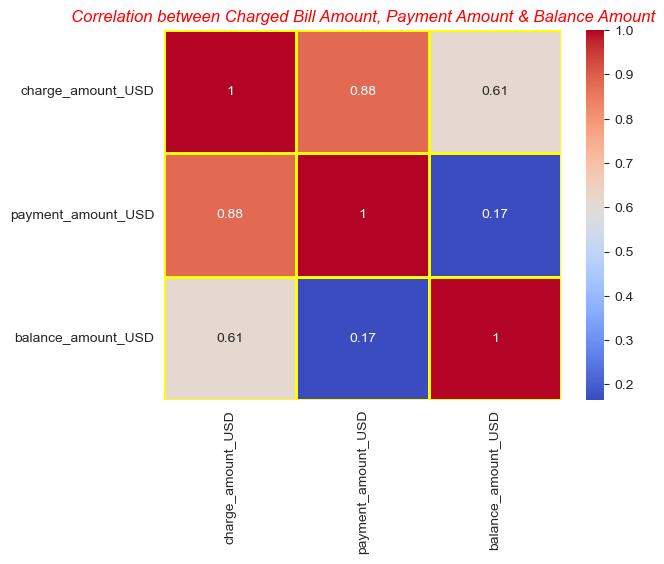

In [67]:
sns.heatmap(data = correlation, linewidth = 1, annot = True, linecolor = 'yellow', cmap = 'coolwarm')
plt.title('Correlation between Charged Bill Amount, Payment Amount & Balance Amount', color = 'red', style = 'italic')
plt.show()

In [68]:
#8. Box plot: To find the Average charged amount in state of emergency

In [69]:
pivot_table = pd.pivot_table(df, values = 'charge_amount_USD', columns = 'is_emergency', index = 'payer_type', aggfunc ='mean')

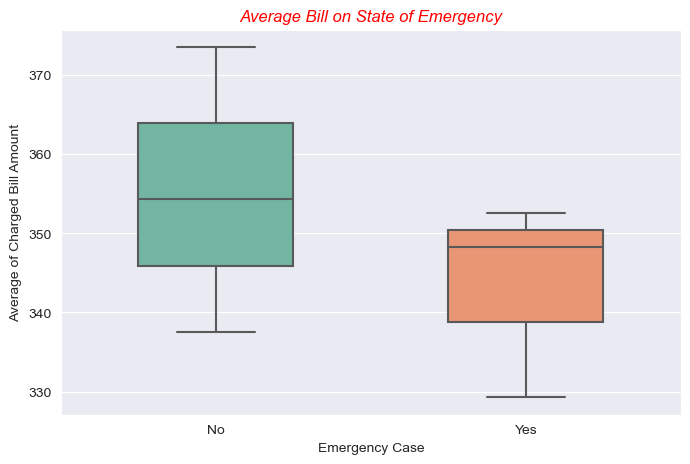

In [70]:
plt.figure(figsize=(8,5))
sns.boxplot(data = pivot_table, width = 0.5, linewidth = 1.5, palette = 'Set2')
plt.xlabel('Emergency Case')
plt.ylabel('Average of Charged Bill Amount')
plt.title('Average Bill on State of Emergency', color = 'red', style = 'italic')
sns.set_style('darkgrid')
plt.show()

In [71]:
#9. Violin plot: To find the denied claims from each payer type for both male and female patients

In [72]:
df['denied_claim'] = (df['claim_status'] == 'Denied').astype(int)

In [73]:
denied_sum = df[df['denied_claim']==1].groupby('payer_type')['charge_amount_USD'].sum()

In [74]:
denied_sum

payer_type
Government    227679.0
Insurance     206542.0
Name: charge_amount_USD, dtype: float64

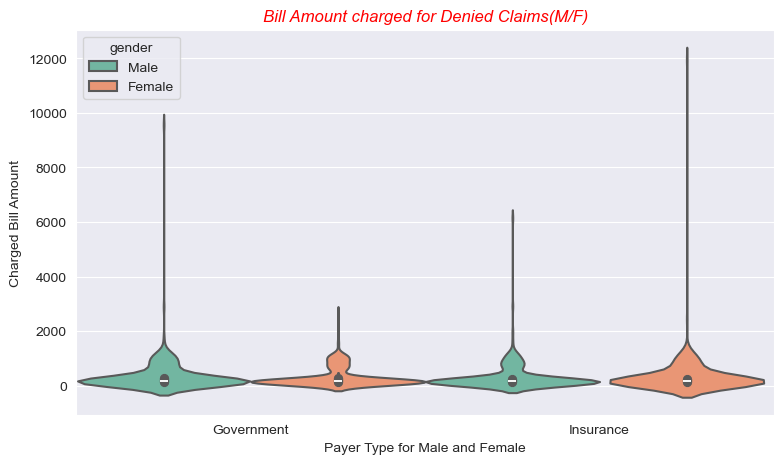

In [75]:
plt.figure(figsize=(9,5))
sns.violinplot(data = df[df['denied_claim']==1], y = 'charge_amount_USD', x = 'payer_type', hue = 'gender',
               width = 1, linewidth = 1.5, palette = 'Set2', inner = 'box', density_norm ='count')
plt.xlabel('Payer Type for Male and Female')
plt.ylabel('Charged Bill Amount')
plt.title('Bill Amount charged for Denied Claims(M/F)', color = 'red', style = 'italic')
plt.show()

In [76]:
df1 = df.groupby(['payer_type', 'department'])['charge_amount_USD'].mean().unstack()

In [77]:
df1

department,Cardiology,Neurology,Oncology,Orthopedics,Pediatrics
payer_type,,,,,
Government,268.748166,185.056511,944.448113,192.492611,73.803714
Insurance,283.622500,194.812658,940.412195,197.149606,80.104061
Self-pay,275.573009,188.922280,1100.057743,197.661417,71.904282


In [78]:
#10. Scatter plot: To determine whether higher bills more likely to be denied!

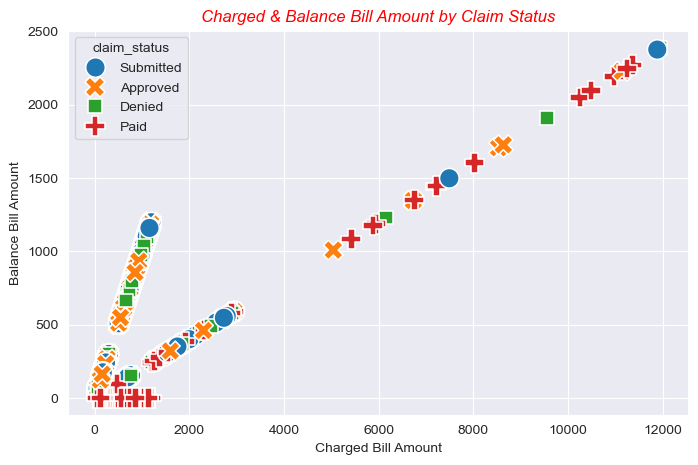

In [79]:
plt.figure(figsize=(8,5))
sns.scatterplot(data =df, x = 'charge_amount_USD', y = 'balance_amount_USD', hue = 'claim_status', style = 'claim_status', s = 200)
sns.set_style('darkgrid')
plt.ylabel('Balance Bill Amount')
plt.xlabel('Charged Bill Amount')
plt.title('Charged & Balance Bill Amount by Claim Status', color = 'red', style = 'italic')
plt.show()

In [80]:
#11. HeatMap: How bill charges vary across patient type and insurance provider!

In [81]:
pivot = df.pivot_table(values = 'charge_amount_USD', index = 'payer_type', columns = 'visit_type', aggfunc = 'sum')

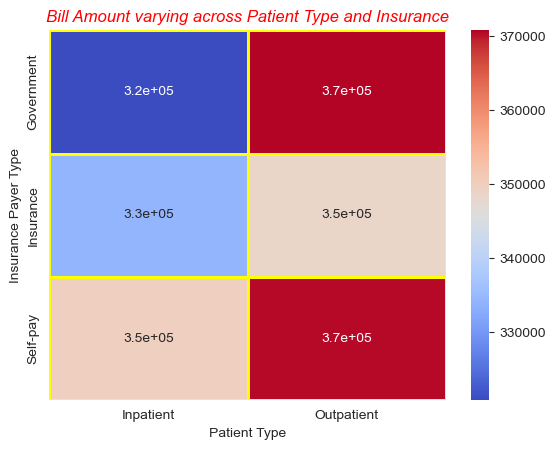

In [82]:
sns.heatmap(pivot, annot = True, linewidth = 1, linecolor = 'yellow', cmap = 'coolwarm')
plt.xlabel('Patient Type')
plt.ylabel('Insurance Payer Type')
plt.title('Bill Amount varying across Patient Type and Insurance', color = 'red', style = 'italic')
plt.show()

In [83]:
#12. Count Plot: To find out the claim rate across different physicians

In [84]:
physician_order = df['physician_id'].value_counts().head(11).index

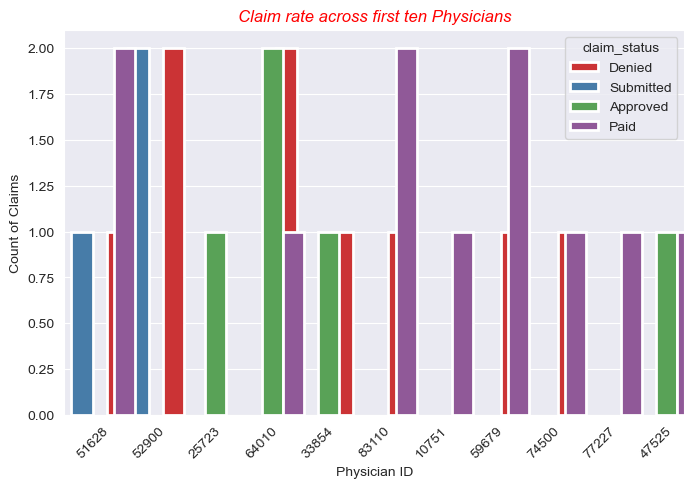

In [85]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'physician_id', hue = 'claim_status', order = physician_order, 
             width = 1.5, palette = 'Set1', edgecolor = 'white', linewidth = 2, 
             hue_order = ['Denied', 'Submitted', 'Approved', 'Paid'])
plt.xticks(rotation = 45)
plt.xlabel('Physician ID')
plt.ylabel('Count of Claims')
plt.title('Claim rate across first ten Physicians', color = 'red', style ='italic')
plt.show()

In [86]:
#13. Bar Chart: To find out the Average bill amount paid to each department

In [87]:
df1 = df.groupby(['department', 'payer_type'])['payment_amount_USD'].mean().unstack()

In [88]:
df1

payer_type,Government,Insurance,Self-pay
department,,,
Cardiology,39.687042,51.480000,265.174779
Neurology,22.034398,31.149367,182.632124
Oncology,87.264151,79.687805,1047.175853
Orthopedics,32.078818,32.209974,189.362205
Pediatrics,12.010610,17.949239,69.057935


In [89]:
labels = df1.index
Government =  df1['Government']
Insurance = df1['Insurance']
Self_Pay = df1['Self-pay']

In [90]:
x_indices = np.arange(len(labels))
bar_width = 0.3

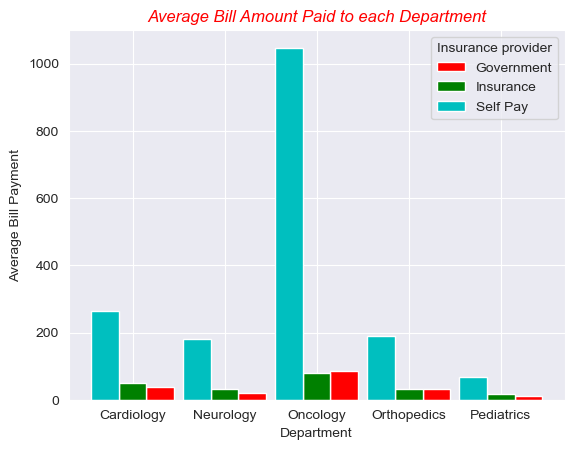

In [91]:
plt.bar(x_indices + bar_width, Government, width = bar_width, color = 'red', label = 'Government')
plt.bar(x_indices, Insurance, width = bar_width, color = 'green', label = 'Insurance')
plt.bar(x_indices - bar_width, Self_Pay, width = bar_width, color = 'c', label = 'Self Pay')
plt.xticks(x_indices, labels)
plt.legend(title = 'Insurance provider')
plt.xlabel('Department')
plt.ylabel('Average Bill Payment')
plt.title('Average Bill Amount Paid to each Department', color = 'red', style = 'italic')
plt.show()

In [92]:
# 14. Pie chart: To find out the number of denied claims across each diagnosis

In [93]:
df['denied_claim']

0       0
1       0
2       1
3       0
4       0
       ..
5995    1
5996    0
5997    0
5998    0
5999    0
Name: denied_claim, Length: 6000, dtype: int32

In [94]:
denied = df[df['denied_claim']==1].groupby('diagnosis')['patient_id'].count()

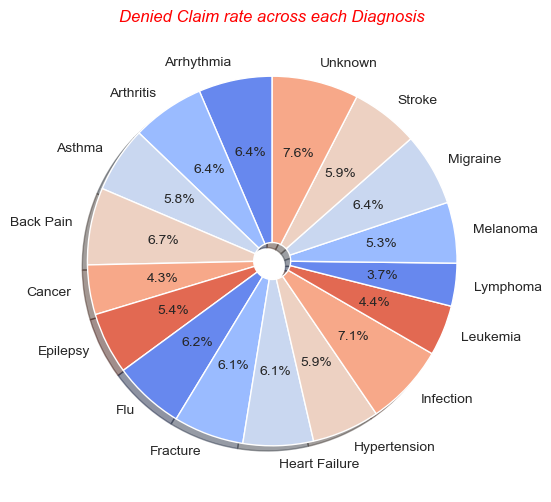

In [95]:
plt.figure(figsize=(6,6))
plt.pie(denied, labels = denied.index, autopct = '%1.1f%%', wedgeprops = {'width':0.9, 'edgecolor': 'white'},
         startangle = 90, colors = sns.color_palette("coolwarm"), shadow = True)
plt.title('Denied Claim rate across each Diagnosis', color = 'red', style = 'italic')
plt.show()

111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111000000000000000000000000000000000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111